<a href="https://colab.research.google.com/github/jacob7123/TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problem.

A classification is where you try to classifysomething as one thing or another.

A few types of classification problem:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

#create circles
X, y = make_circles(n_samples,
           noise=0.03,
           random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... Let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0" : X[:, 0], "X1" : X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


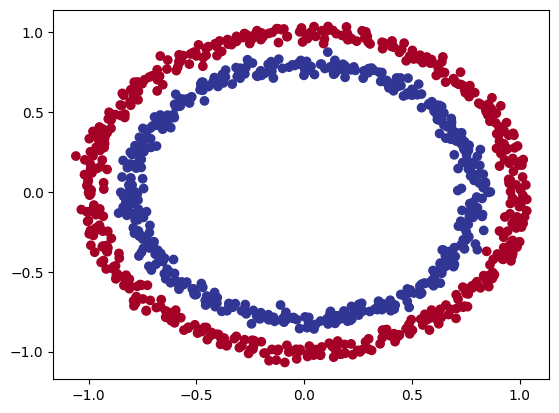

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Imput and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we are working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...


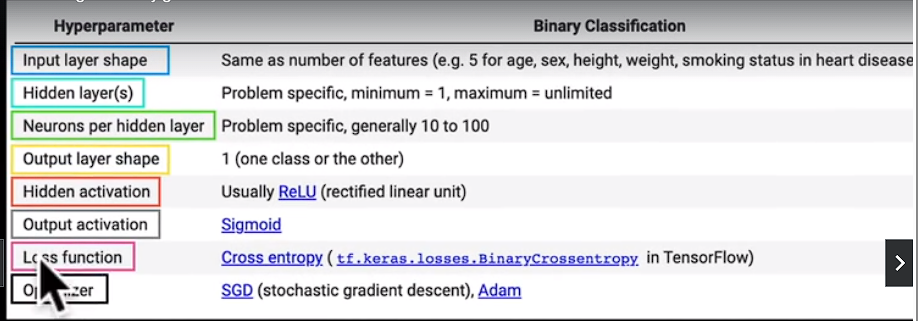

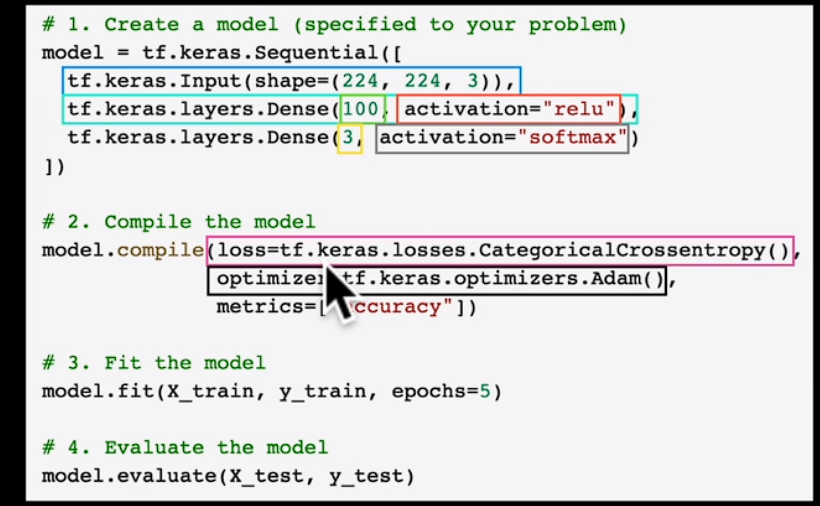

In [9]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [10]:
# Set the random_seed
tf.random.set_seed(42)

# 1. Create the model using the Sequentail API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = tf.keras.optimizers.SGD(),
        metrics = ["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 3s 7ms/step - loss: 5.8537 - accuracy: 0.4830
Epoch 2/5
32/32 [==============================] - 0s 12ms/step - loss: 5.7047 - accuracy: 0.4860
Epoch 3/5
32/32 [==============================] - 0s 13ms/step - loss: 5.3826 - accuracy: 0.4610
Epoch 4/5
32/32 [==============================] - 0s 9ms/step - loss: 4.2701 - accuracy: 0.4660
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 4.3931 - accuracy: 0.5170


In [11]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our model is getting around ~50% accuracy... it is performing as if is is guessing.

So let's step things up a notch and add an extra layer.


In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.SGD(),
        metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932737827301025, 0.5]

In [14]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can inprove our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layers.
2. Compiling a model - here we might to choose a different optimization function such as Adam insteat of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs(leave it training for longer).

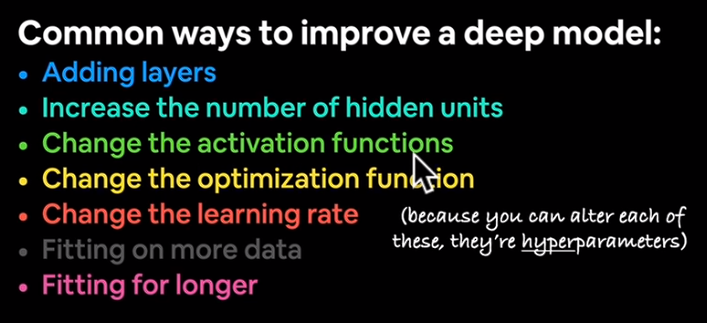

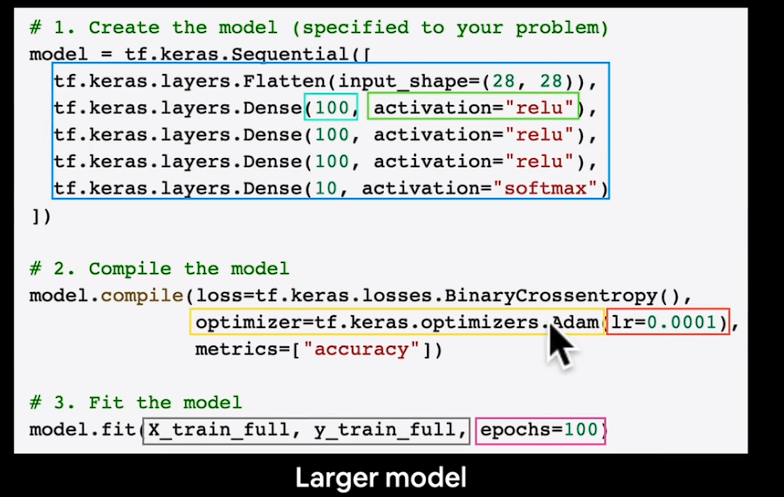

In [15]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model(this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dens neurons, and 100 is hidden units
  tf.keras.layers.Dense(10), # add another layer with 10 neurous
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.5080


[0.6974483132362366, 0.5080000162124634]

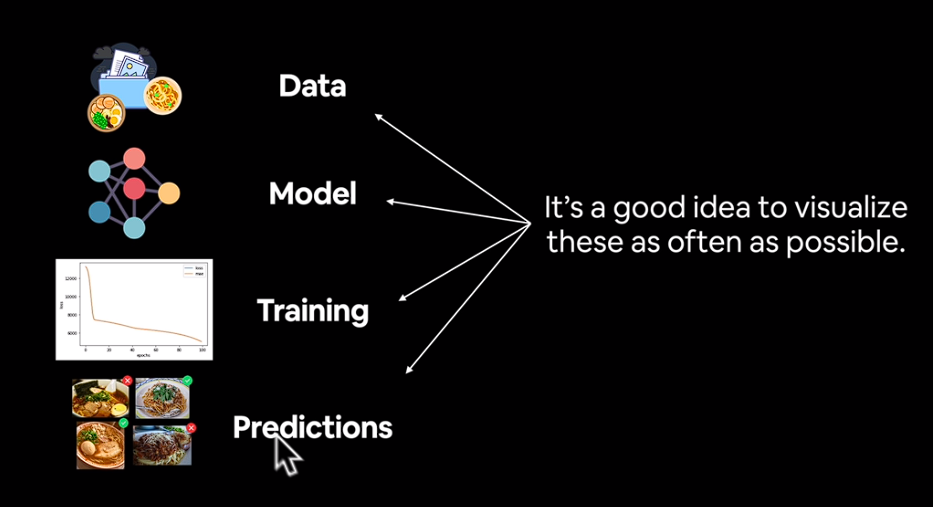

To visulize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and label (Y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the prections as well as a line between zones(where each unique class falls)

In [17]:
import numpy as np

In [18]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
              np.linspace(y_min, y_max, 100))

  # Create X value(we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D array together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi_class
  if len(y_pred[0]) > 1:
    print("doing multicalss classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


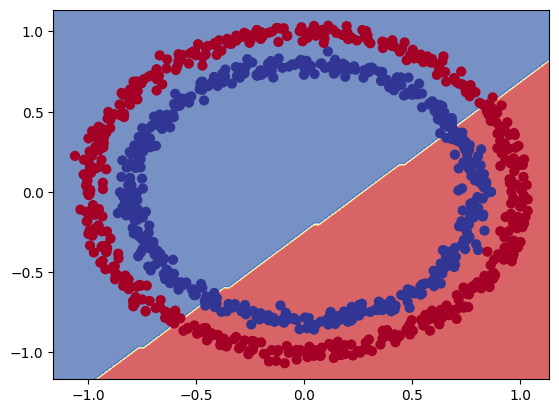

In [19]:
# Check out predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [20]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

oh wait... we compiled our model for a binary classification problem.

But... we are working on a regression problem, let's change the model to suit our data.

In [21]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 402.0994 - mae: 402.0994
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 266.0002 - mae: 266.0002
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 134.2130 - mae: 134.2130
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 51.1660 - mae: 51.1660
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 86.1396 - mae: 86.1396
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 70.6884 - mae: 70.6884
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 43.8616 - mae: 43.8616
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 51.7953 - mae: 51.7953
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 42.4506 - mae: 42.4506
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 45.8549 - mae: 45.8549
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 7ms/step


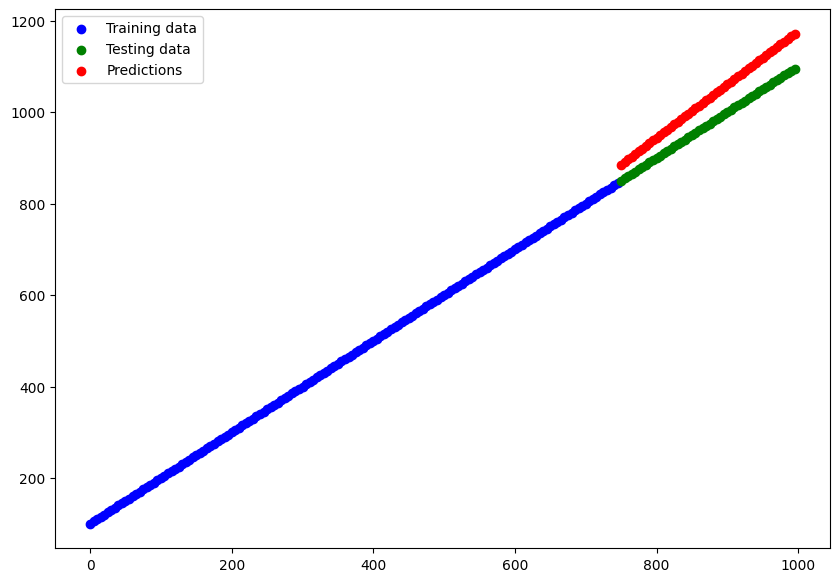

In [22]:
# Mak predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="Training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label="Predictions")
plt.legend();

### The missing piece: Non-linearity

In [23]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3215 - accuracy: 0.4630
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2923 - accuracy: 0.4660
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2834 - accuracy: 0.4670
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2798 - accuracy: 0.4670
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2470 - accuracy: 0.4660
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2053 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0750 - accuracy: 0.4680
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0404 - accuracy: 0.4660
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0319 - accuracy: 0.4660
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0272 - accuracy: 0.4670
Epoch 11/

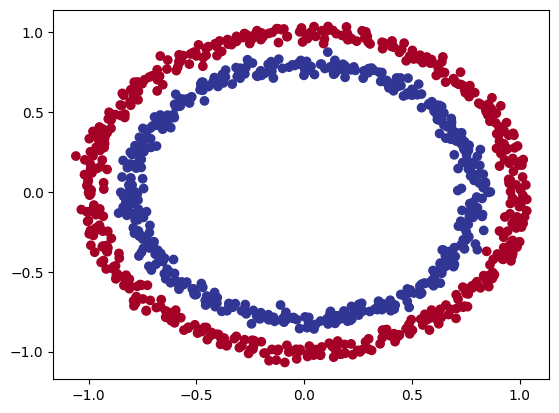

In [24]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


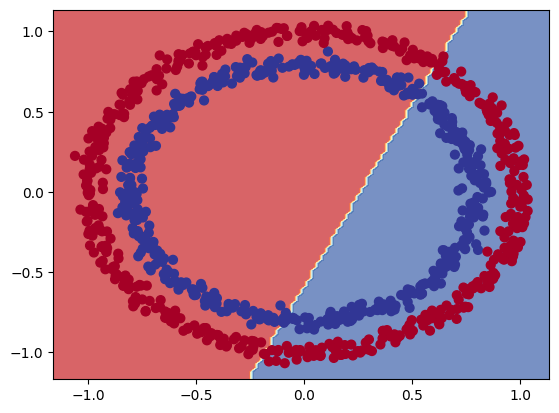

In [25]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
            X=X,
            y=y)

Let's try build our first neural network with a non-linear activation function.

In [26]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9150 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8844 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8697 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8728 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8608 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8594 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8585 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8575 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8565 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8556 - accuracy: 0.4830
Epoch 11/

In [27]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model(2 hidden layers and 4 neurons for each)
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 5ms/step - loss: 1.0268 - accuracy: 0.4080
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 0.9210 - accuracy: 0.4130
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8844 - accuracy: 0.4350
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8614 - accuracy: 0.4270
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8420 - accuracy: 0.4240
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 0.8259 - accuracy: 0.4190
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 0.8110 - accuracy: 0.4330
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7980 - accuracy: 0.4210
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7834 - accuracy: 0.4220
Epoch 10/250
32/32 [==============================] - 0s 5ms/step - loss: 0.7709 - accuracy: 0.3690
Epoch 11/

In [28]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0649 - accuracy: 0.9900


[0.06494970619678497, 0.9900000095367432]

313/313 [==============================] - 1s 3ms/step
doing binary classification


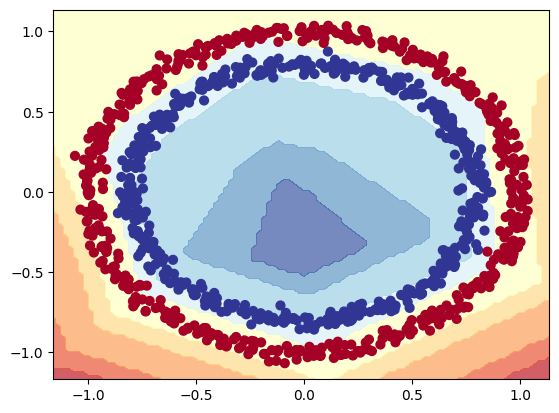

In [29]:
plot_decision_boundary(model=model_6,
            X=X,
            y=y)

In [30]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model(add output layer activation)
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.6951 - accuracy: 0.4960
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5060
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5050
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5020
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5060
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5040
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5090
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5120
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5140
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5170
Epoch 11/

In [31]:
# 4. Evaluate our latest model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.9550


[0.3108503520488739, 0.9549999833106995]

313/313 [==============================] - 1s 2ms/step
doing binary classification


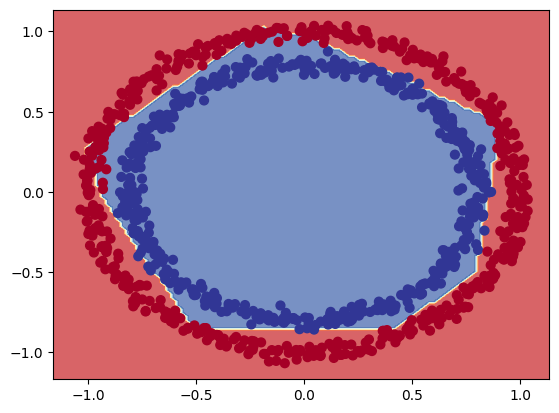

In [32]:
# Let's visualize our incredible metrics
plot_decision_boundary(model=model_7, X=X, y=y)

🤔 **Question:** What is wrong the predictions we have made? Are we really evaluating our model coorectly? Hint: what data did the model learn on and what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear(non-straight line) functions** is one of the key fundamentals of neural networks.

Now we have discussed the concept of linear and non-linear functions(or lines), let's see them in action.


In [33]:
# Create a toy a tensor(similar tothe data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

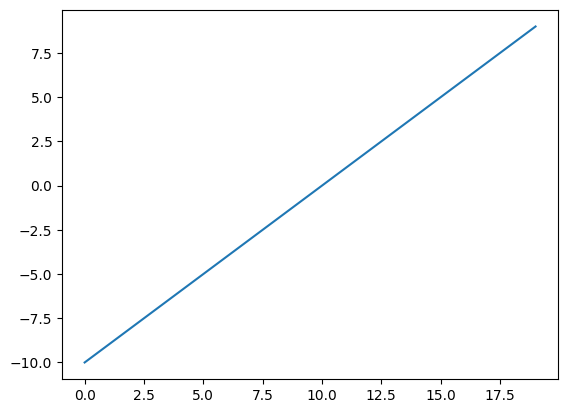

In [34]:
# Visualize our toy tensor
plt.plot(A)

In [35]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

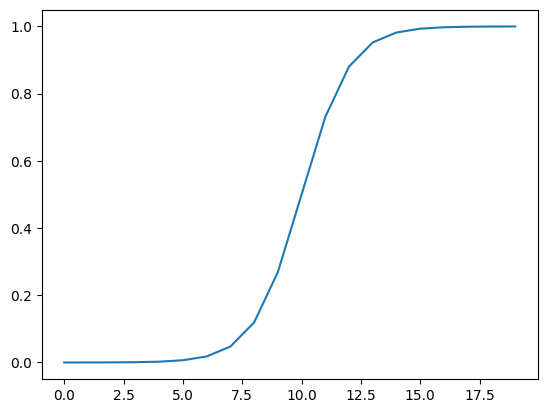

In [36]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [37]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(x, 0)

# Pass our toy tensor to our custom relu function
relu(A), A

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
        7., 8., 9.], dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>)

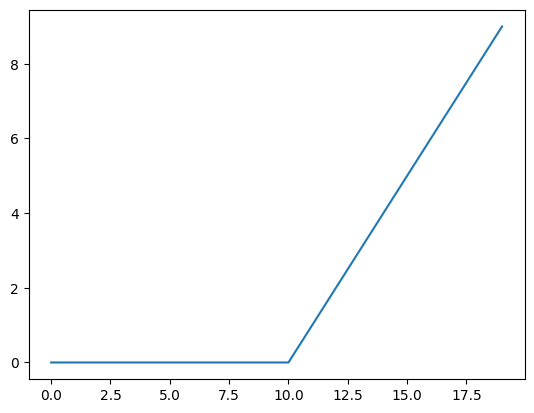

In [38]:
# Plot ReLu-modified tensor
plt.plot(relu(A))

In [39]:
# Let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

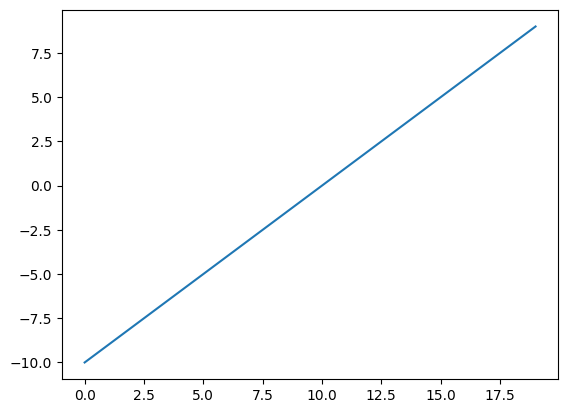

In [40]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [41]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

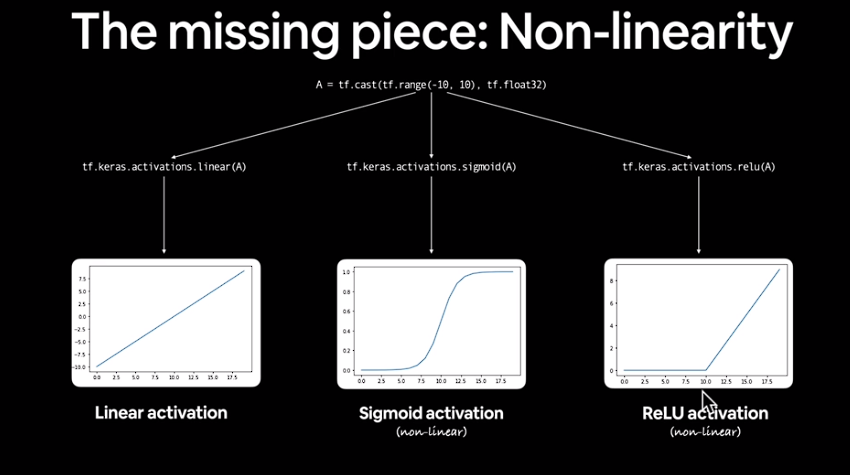

## Evaluating and improving our classification

So far we have been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.


In [42]:
# Check how many examples we have
len(X)

1000

In [43]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [44]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create a model(same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6980 - accuracy: 0.5000
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5225
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5750
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.6425
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.6525
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6426 - accuracy: 0.6162
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6225 - accuracy: 0.7725
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.7750
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.7525
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.7900
Epoch 11/25
25/25 [

In [45]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0805 - accuracy: 0.9950


[0.0805453211069107, 0.9950000047683716]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 2ms/step
doing binary classification


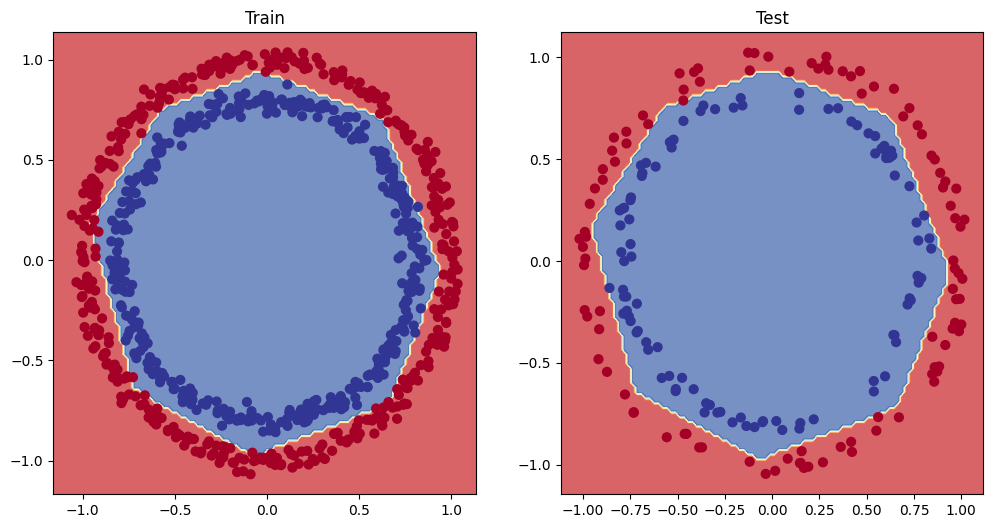

In [46]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss(or training) curves

In [48]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.697978,0.50000
1,0.685853,0.52250
2,0.678106,0.57500
3,0.669699,0.64250
4,0.658305,0.65250
5,0.642576,0.61625
6,0.622500,0.77250
7,0.600751,0.77500
8,0.575007,0.75250
9,0.544901,0.79000


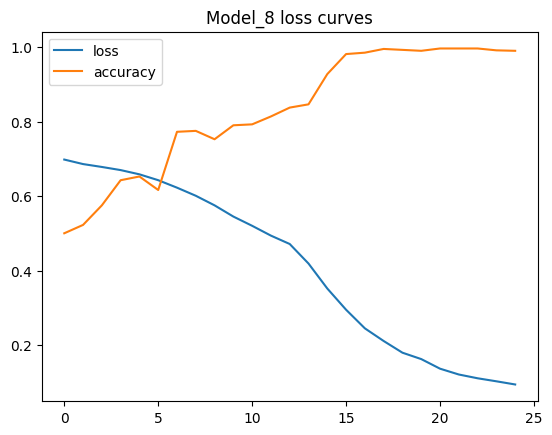

In [50]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

**Note:** For many problems, the loss function going down means the model is improving(the predictions it is making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate(the learning rate where the loss decresses the most during traning) we are going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your model *while* its training.
* Another model(we could use the same one as above, but we are practicing building models here)
* A modified loss curves plot.

In [56]:
# Set random seed
tf.random.set_seed(42)

# Create a model(same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
        optimizer="Adam",
        metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model(passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
             y_train,
             epochs=100,
             callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6981 - accuracy: 0.4975 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4963 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5038 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5100 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

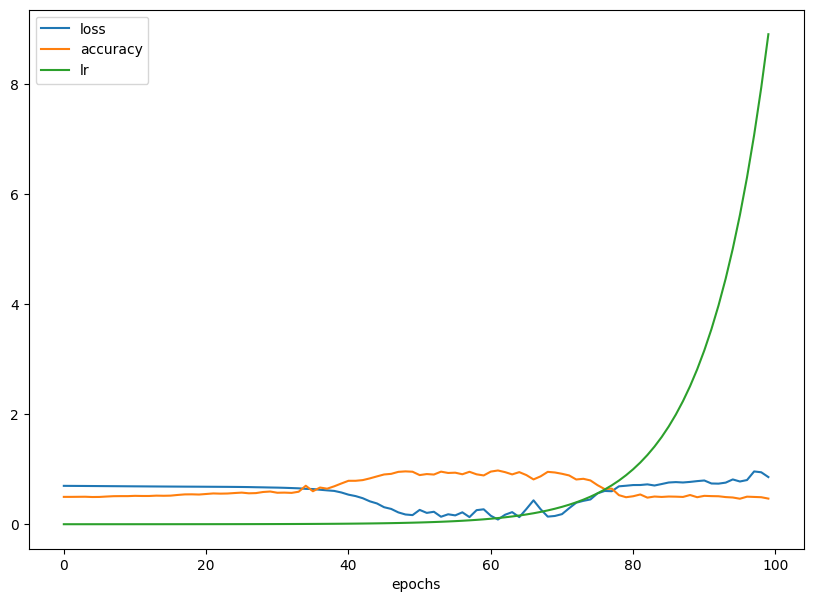

In [57]:
# Checkout history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

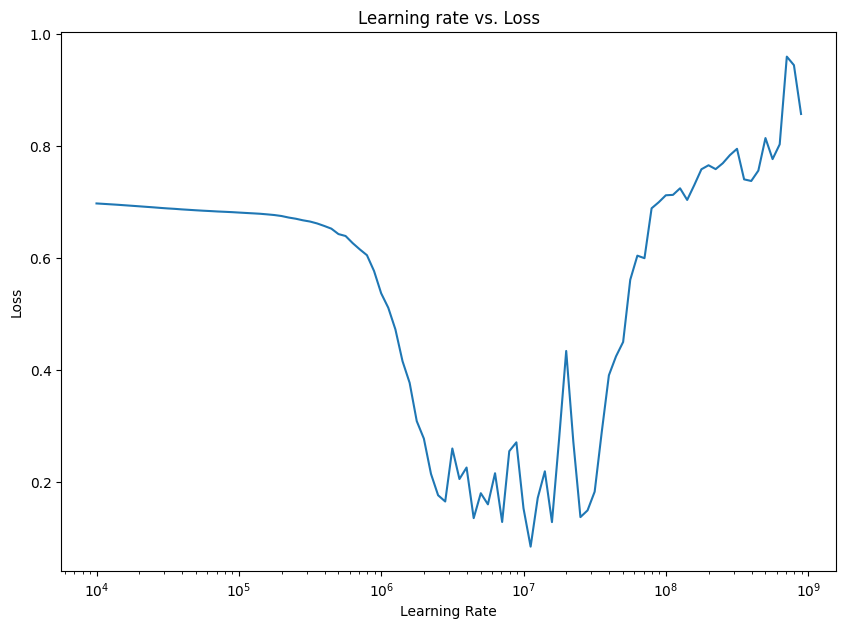

In [61]:
# Plot the learning rate versus the loss
lrs = 1e4 * (10 ** (tf.range(100) / 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

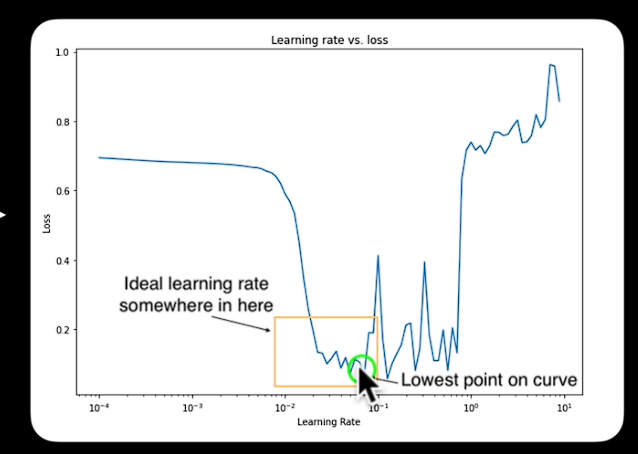

In [62]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-4, 1e-4

(1, 0.1, 0.01, 0.0001, 0.0001)